In [1]:
1+1

2

In [1]:
import pandas as pd
import numpy as np
import random
from scipy.stats import pointbiserialr
from sklearn.preprocessing import OrdinalEncoder
import h5py
import os

# Data Viz

import seaborn as sns
import matplotlib.pyplot as plt

# Image Processing

import cv2
from PIL import Image
from io import BytesIO
import os

# Deep Learning Modules

from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
path = r'C:\Users\tejas\Desktop\ISIC2024_SkinCancerDetection'
if not os.path.exists(path):
    os.makedirs(path)
os.chdir(path)

In [5]:
train_features_df=pd.read_csv('data/train-metadata.csv')
test_features_df=pd.read_csv('data/test-metadata.csv')

In [6]:
train_features_df.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [22]:
print(train_features_df.shape)
print('-------------------------')
print('Total number of features\n')
print(train_features_df.columns)
print('-------------------------')
print('Statistical information\n')
print(train_features_df.describe())

(401059, 55)
-------------------------
Total number of features

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'idd

In [23]:
#Value counts of categorial columns
value_counts_dict = {}

for col in train_features_df.select_dtypes(include='object').columns:
    value_counts = train_features_df[col].value_counts()
    value_counts_dict[col] = value_counts

# Convert the dictionary to a DataFrame for better display
value_counts_df = pd.DataFrame(value_counts_dict)

value_counts_df

,isic_id,patient_id,sex,anatom_site_general,image_type,tbp_tile_type,tbp_lv_location,tbp_lv_location_simple,attribution,copyright_license,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index
0/mm^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
1/mm^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2/mm^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3/mm^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3D: XP,NaN,NaN,NaN,NaN,NaN,285903.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
head/neck,NaN,NaN,NaN,12046.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lower extremity,NaN,NaN,NaN,103028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
male,NaN,NaN,265546.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
posterior torso,NaN,NaN,NaN,121902.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing Data Analysis:
                              Missing Values  Percentage
iddx_5                                401058   99.999751
mel_mitotic_index                     401006   99.986785
mel_thick_mm                          400996   99.984292
iddx_4                                400508   99.862614
iddx_3                                399994   99.734453
iddx_2                                399991   99.733705
lesion_id                             379001   94.500061
sex                                    11517    2.871647
anatom_site_general                     5756    1.435200
age_approx                              2798    0.697653
tbp_lv_norm_color                          0    0.000000
tbp_lv_stdL                                0    0.000000
tbp_lv_radial_color_std_max                0    0.000000
tbp_lv_perimeterMM                         0    0.000000
isic_id                                    0    0.000000
tbp_lv_norm_border                         0    0.000000
tbp_lv_

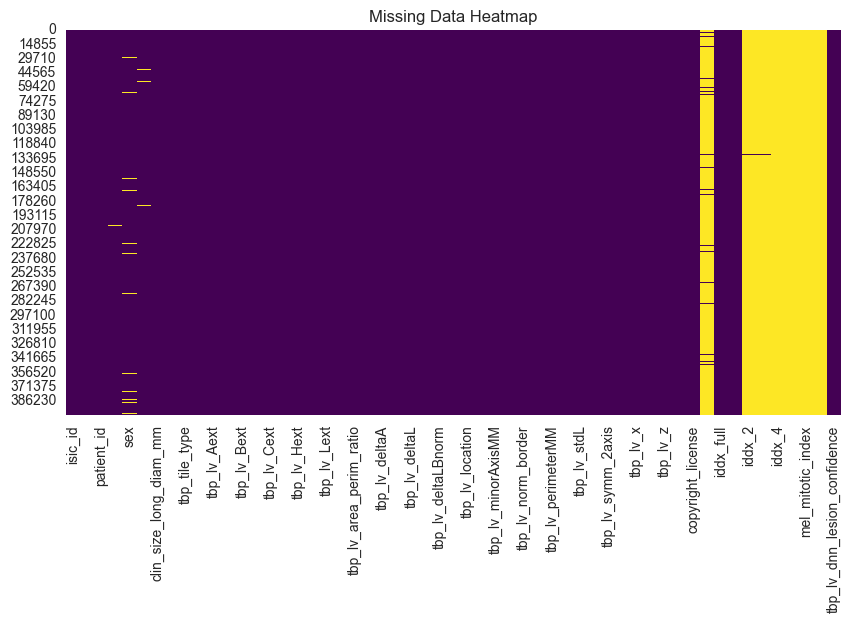

In [24]:
# Missing Data Analysis
print("\nMissing Data Analysis:")
missing_data = train_features_df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(train_features_df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_df)

# Visualize missing data
plt.figure(figsize=(10, 5))
sns.heatmap(train_features_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

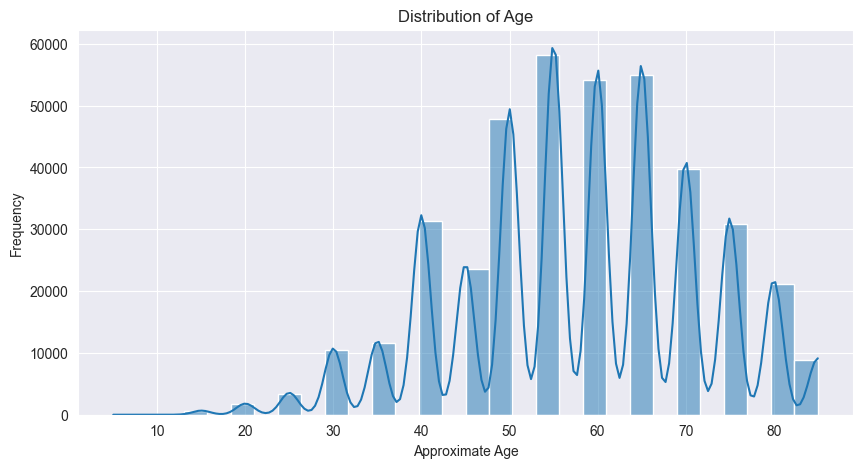

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(train_features_df['age_approx'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Approximate Age')
plt.ylabel('Frequency')
plt.show()

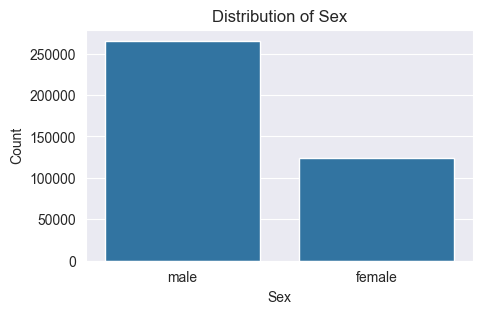

In [30]:
plt.figure(figsize=(5, 3))
sns.countplot(x='sex', data=train_features_df)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

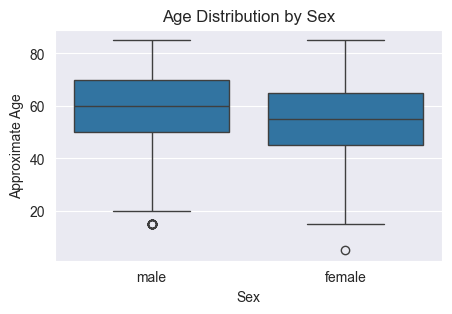

In [29]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='sex', y='age_approx', data=train_features_df)
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Approximate Age')
plt.show()

In [32]:
total_benign = train_features_df[train_features_df['target'] == 0].shape[0]
total_malignant = train_features_df[train_features_df['target'] == 1].shape[0]

benign_counts = train_features_df[train_features_df['target'] == 0]['patient_id'].value_counts()
malignant_counts = train_features_df[train_features_df['target'] == 1]['patient_id'].value_counts()

benign_malignant_counts = pd.DataFrame({
    'Benign': benign_counts,
    'Malignant': malignant_counts
}).fillna(0)

print("\nCounts of benign and malignant cases per patient:")
print(benign_malignant_counts)



Counts of benign and malignant cases per patient:
            Benign  Malignant
patient_id                   
IP_0008821   102.0        0.0
IP_0014998   352.0        0.0
IP_0023586   938.0        1.0
IP_0028775   212.0        0.0
IP_0028993   225.0        0.0
...            ...        ...
IP_9916724   221.0        0.0
IP_9970422   187.0        0.0
IP_9978624   150.0        1.0
IP_9979014     2.0        0.0
IP_9989989    60.0        1.0

[1042 rows x 2 columns]



Summary statistics of age_approx by target:
           count       mean        std   min   25%   50%   75%   max
target                                                              
0       397871.0  58.009694  13.597301   5.0  50.0  60.0  70.0  85.0
1          390.0  61.371795  11.932877  20.0  55.0  60.0  70.0  85.0


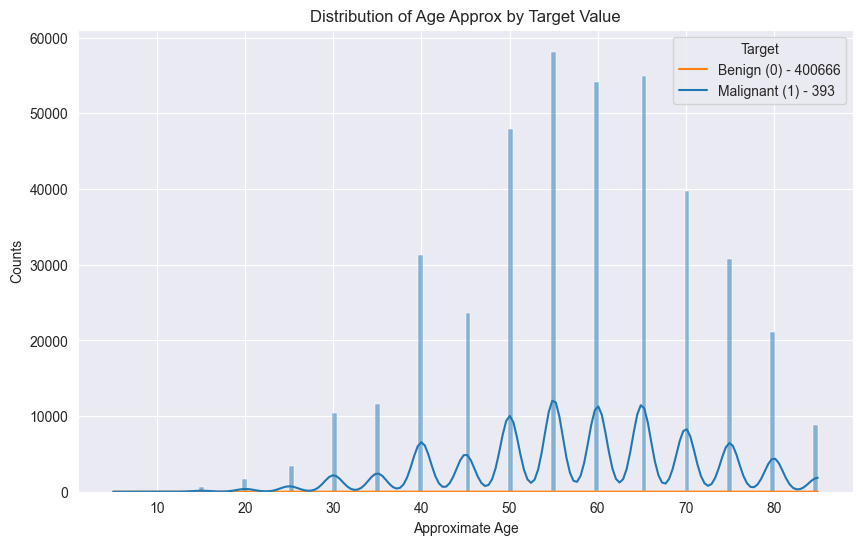

In [34]:
age_target_stats = train_features_df.groupby('target')['age_approx'].describe()
print("\nSummary statistics of age_approx by target:")
print(age_target_stats)

# Plotting the distribution of age_approx by target value
plt.figure(figsize=(10, 6))
sns.histplot(data=train_features_df, x='age_approx', hue='target', multiple='stack', kde=True)
plt.title('Distribution of Age Approx by Target Value')
plt.xlabel('Approximate Age')
plt.ylabel('Counts')
plt.legend(title='Target', labels=[f'Benign (0) - {total_benign}', f'Malignant (1) - {total_malignant}'])
plt.show()

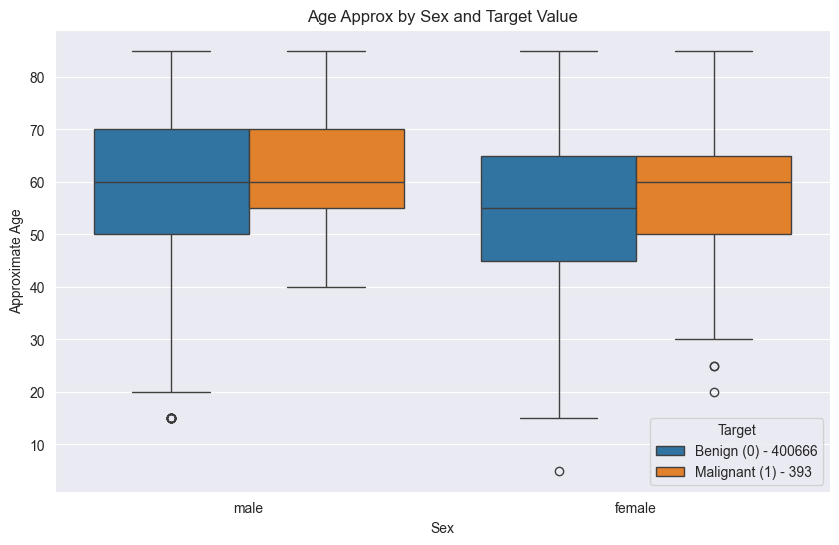

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_features_df, x='sex', y='age_approx', hue='target')
plt.title('Age Approx by Sex and Target Value')
plt.xlabel('Sex')
plt.ylabel('Approximate Age')

# Update the legend
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [f'Benign (0) - {total_benign}', f'Malignant (1) - {total_malignant}']
plt.legend(handles, new_labels, title='Target')
plt.show()

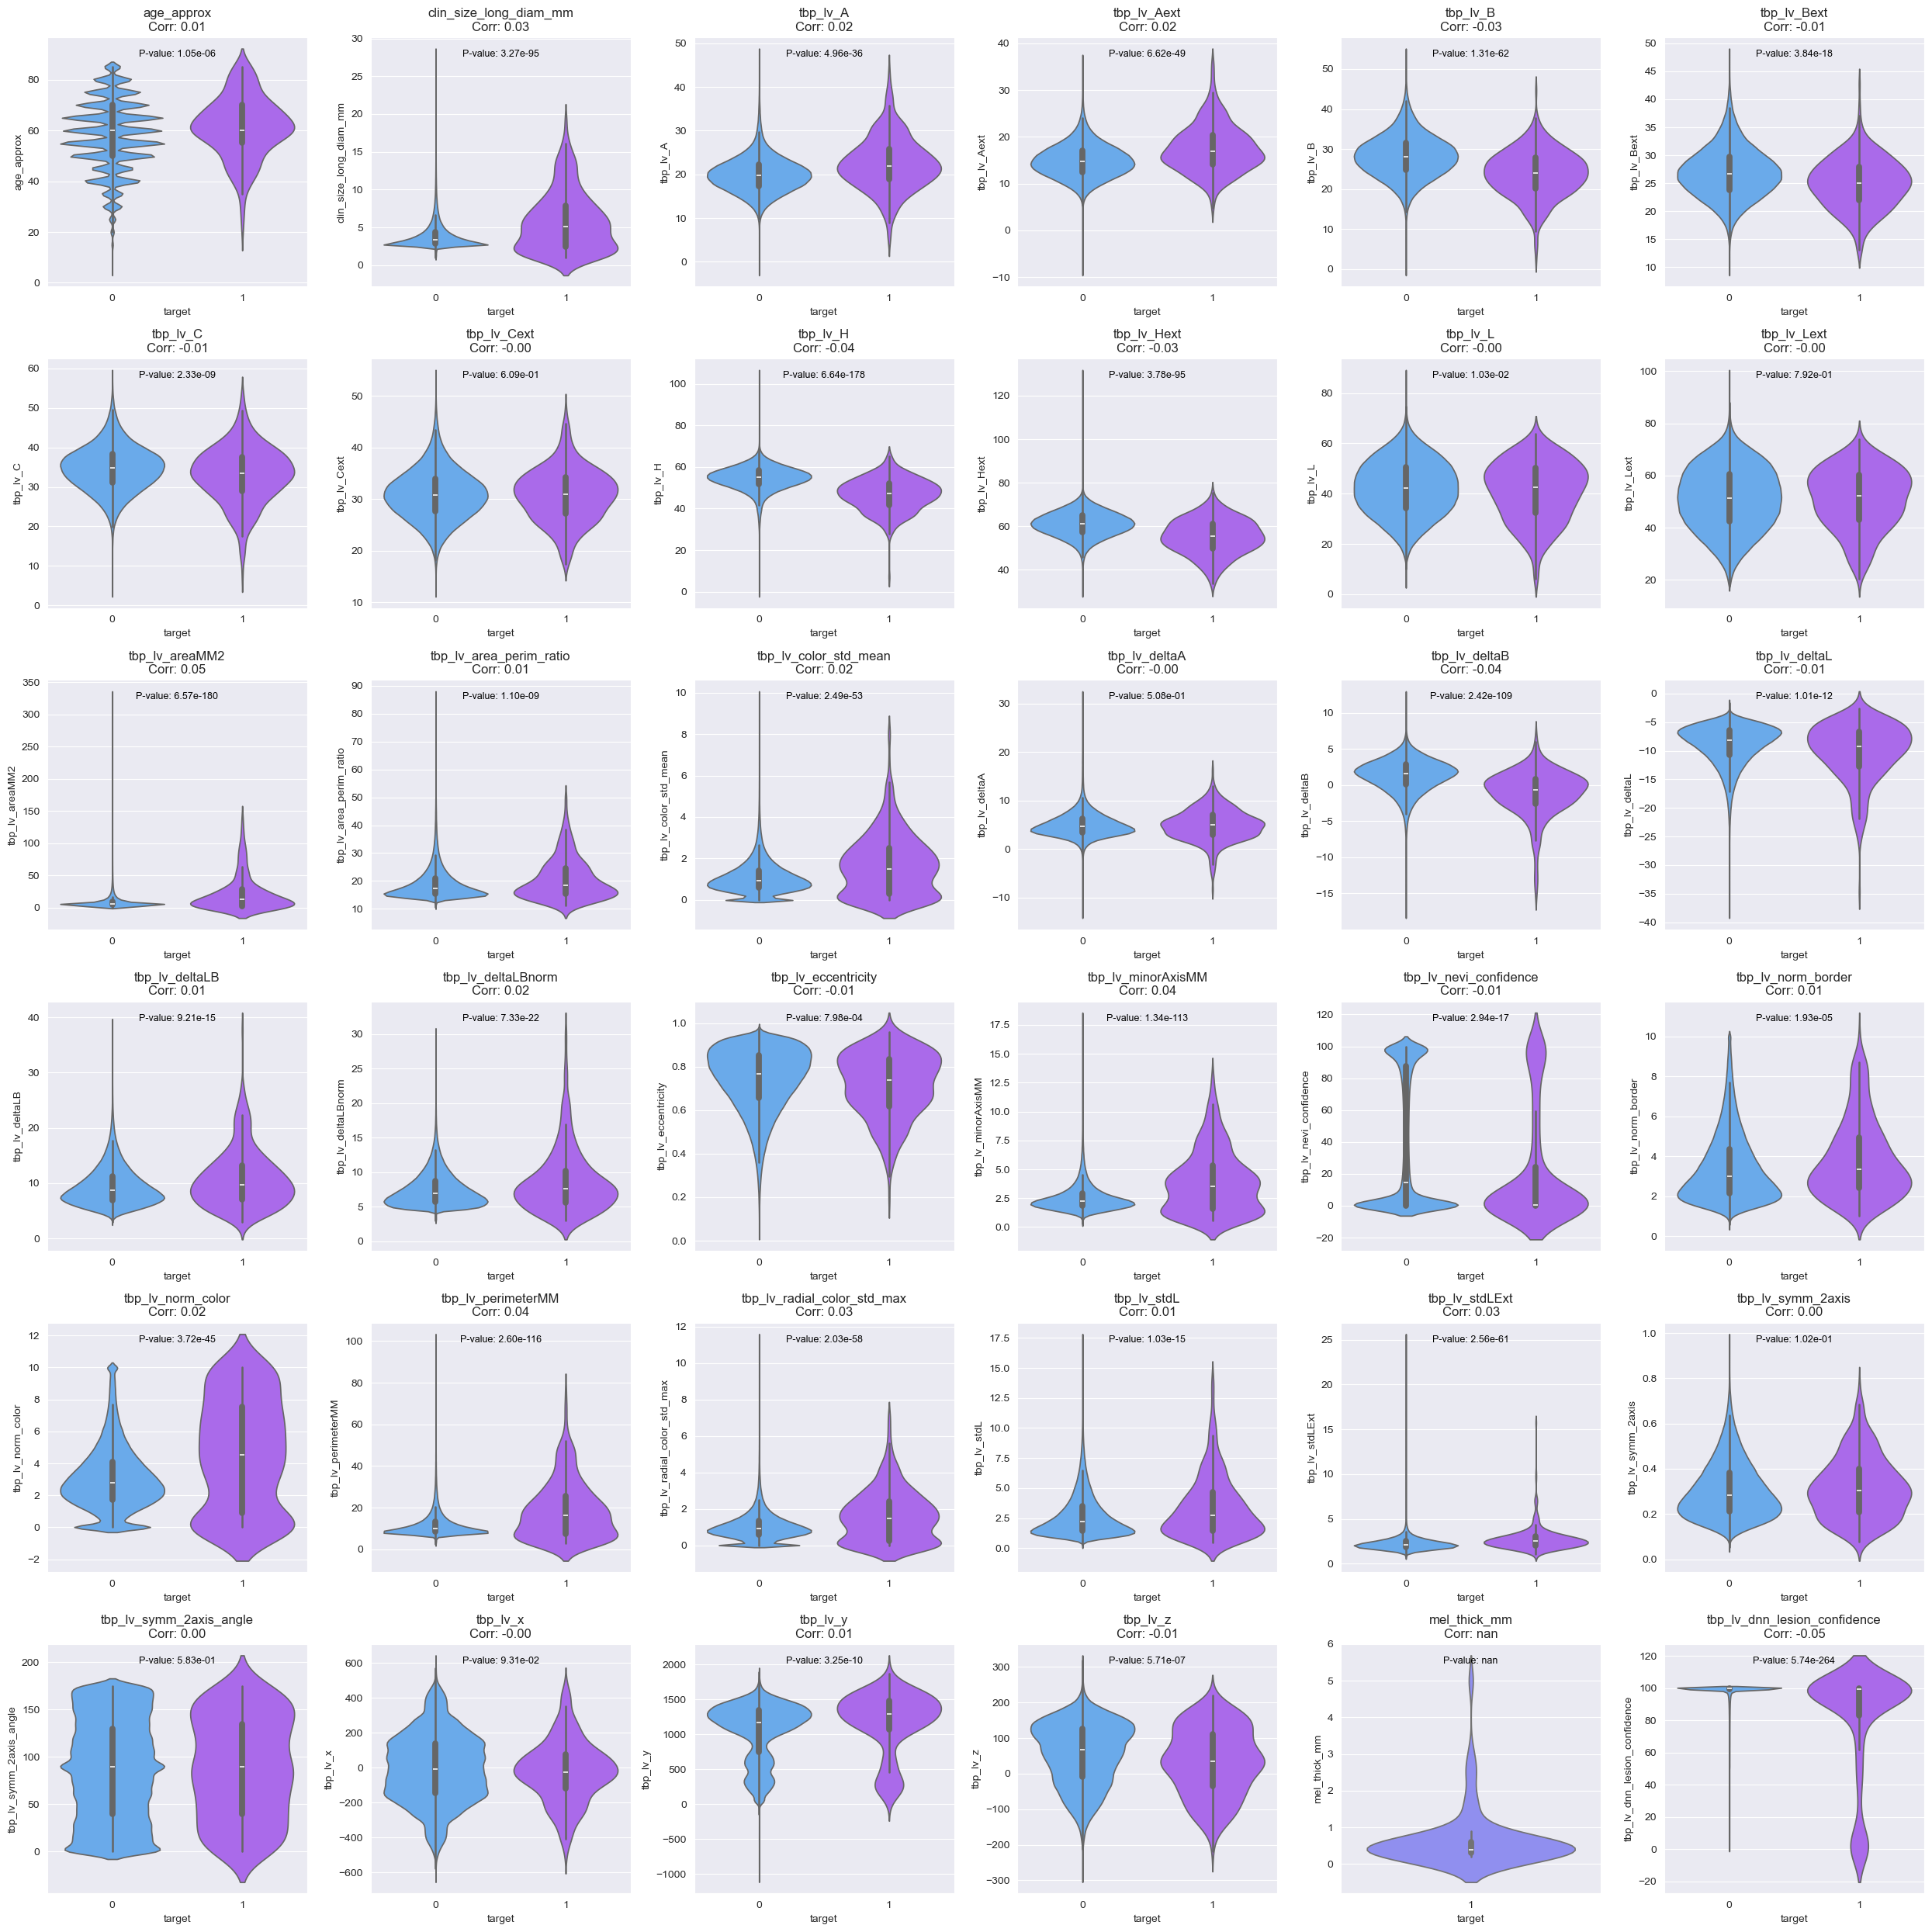

In [8]:
# Supongamos que tienes un DataFrame llamado df
numeric_columns = train_features_df.select_dtypes(include=['number'])

# Crear una figura con un tamaño adecuado para 36 gráficos (6x6)
fig, axes = plt.subplots(6, 6, figsize=(25, 25))

# Iterar sobre las columnas numéricas, excepto 'target'
for idx, column in enumerate(numeric_columns.columns[1:]):
    # Crear un nuevo DataFrame eliminando los valores nulos para la columna actual y 'target'
    df_temp = train_features_df[['target', column]].dropna()
    
    # Calcular la correlación de punto biserial entre 'target' y la columna actual
    correlation, p_value = pointbiserialr(df_temp['target'], df_temp[column])
    
    ax = axes[idx // 6, idx % 6]
    
    # Crear un gráfico de violín para cada columna
    sns.violinplot(x='target', y=column, data=df_temp, ax=ax, palette="cool")
    
    # Establecer el título con la correlación
    ax.set_title(f'{column}\nCorr: {correlation:.2f}')
    
    # Opcional: Anotar el p-value si deseas mostrarlo también
    ax.annotate(f'P-value: {p_value:.2e}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', va='top', fontsize=9, color='black')

# Ajustar el layout para que los gráficos no se solapen
plt.tight_layout()
plt.show()

In [7]:
anatom_site_target_counts = train_features_df.groupby(['anatom_site_general', 'target']).size().unstack(fill_value=0)
print("\nValue counts of anatom_site_general by target:")
print(anatom_site_target_counts)


Value counts of anatom_site_general by target:
target                    0    1
anatom_site_general             
anterior torso        87688   82
head/neck             11968   78
lower extremity      102955   73
posterior torso      121799  103
upper extremity       70500   57


<Figure size 800x300 with 0 Axes>

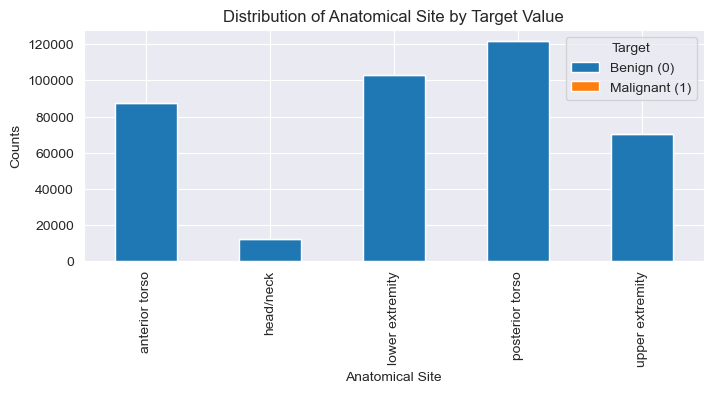

In [11]:
plt.figure(figsize=(8, 3))
anatom_site_target_counts.plot(kind='bar', stacked=True, figsize=(8, 3))
plt.title('Distribution of Anatomical Site by Target Value')
plt.xlabel('Anatomical Site')
plt.ylabel('Counts')
plt.legend(title='Target', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

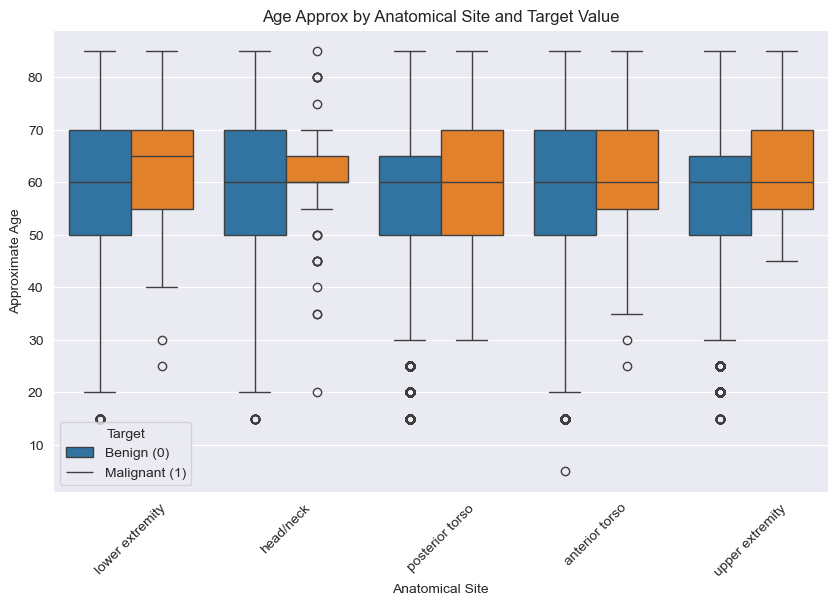

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_features_df, x='anatom_site_general', y='age_approx', hue='target')
plt.title('Age Approx by Anatomical Site and Target Value')
plt.xlabel('Anatomical Site')
plt.ylabel('Approximate Age')
plt.legend(title='Target', labels=['Benign (0)', 'Malignant (1)'])
plt.xticks(rotation=45)
plt.show()

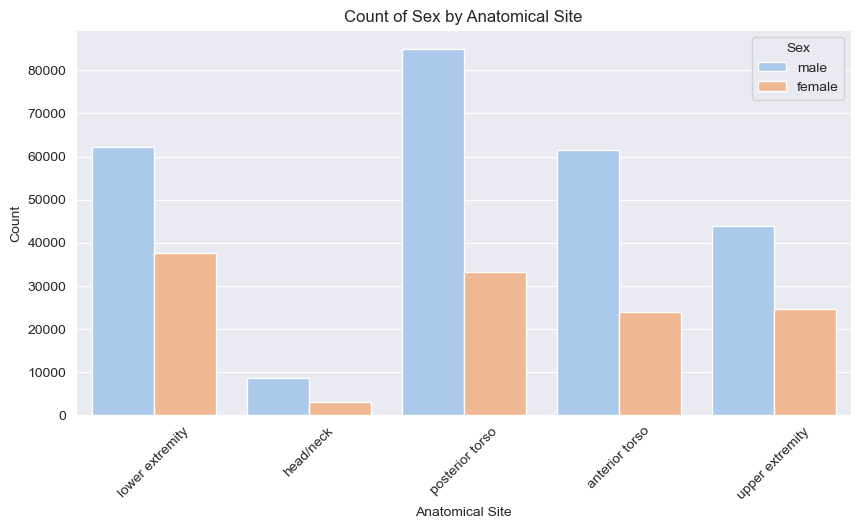

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train_features_df, x='anatom_site_general', hue='sex', palette='pastel')
plt.title('Count of Sex by Anatomical Site')
plt.xlabel('Anatomical Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()

In [19]:
print(train_features_df['anatom_site_general'].unique())

['lower extremity' 'head/neck' 'posterior torso' 'anterior torso'
 'upper extremity' nan]


No images found for anatomical site: nan


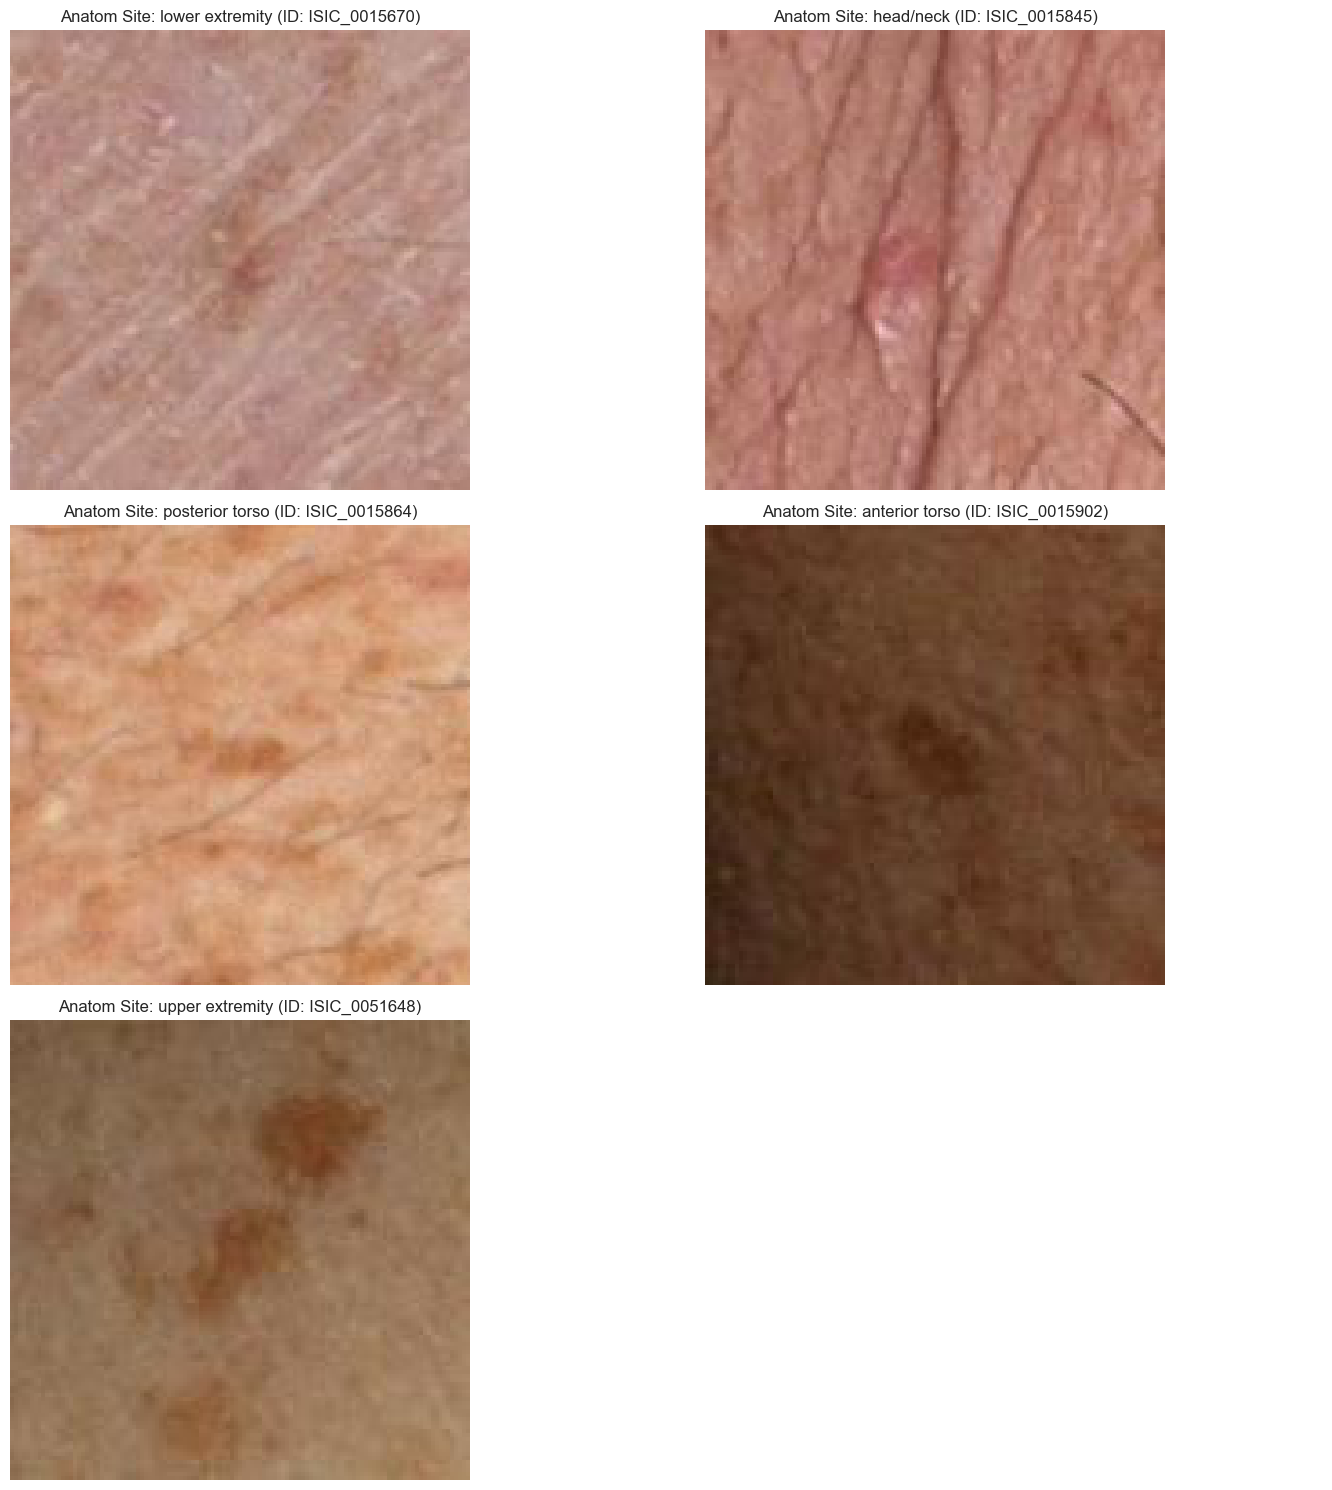

In [18]:
#image analysis
image_path = 'data/train-image/image'
unique_anatom_sites = train_features_df['anatom_site_general'].unique()
images_per_row = 2
num_rows = len(unique_anatom_sites) // images_per_row + (len(unique_anatom_sites) % images_per_row > 0)
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for idx, anatom_site in enumerate(unique_anatom_sites):
    isic_ids = train_features_df[train_features_df['anatom_site_general'] == anatom_site]['isic_id'].values
    
    if len(isic_ids) > 0:
        isic_id = isic_ids[0]
        
        img_file = os.path.join(image_path, isic_id + '.jpg')
        
        # Check if the image file exists
        if os.path.exists(img_file):
            img = Image.open(img_file)
            axes[idx].imshow(img)
            axes[idx].set_title(f'Anatom Site: {anatom_site} (ID: {isic_id})')
            axes[idx].axis('off')
        else:
            print(f'Image not found for {isic_id}')
    else:
        print(f'No images found for anatomical site: {anatom_site}')
        axes[idx].axis('off')

# Hide any unused axes
for ax in axes[len(unique_anatom_sites):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


clin_size_long_diam_mm

In [20]:
clin_size_target_counts = train_features_df.groupby(['clin_size_long_diam_mm', 'target']).size().unstack(fill_value=0)
print("\nValue counts of clin_size_long_diam_mm by target:")
print(clin_size_target_counts)


Value counts of clin_size_long_diam_mm by target:
target                   0  1
clin_size_long_diam_mm       
1.00                     8  0
1.01                     2  1
1.02                     2  0
1.03                    11  0
1.04                    31  0
...                     .. ..
24.88                    1  0
25.00                    1  0
26.22                    1  0
28.04                    1  0
28.40                    1  0

[1758 rows x 2 columns]


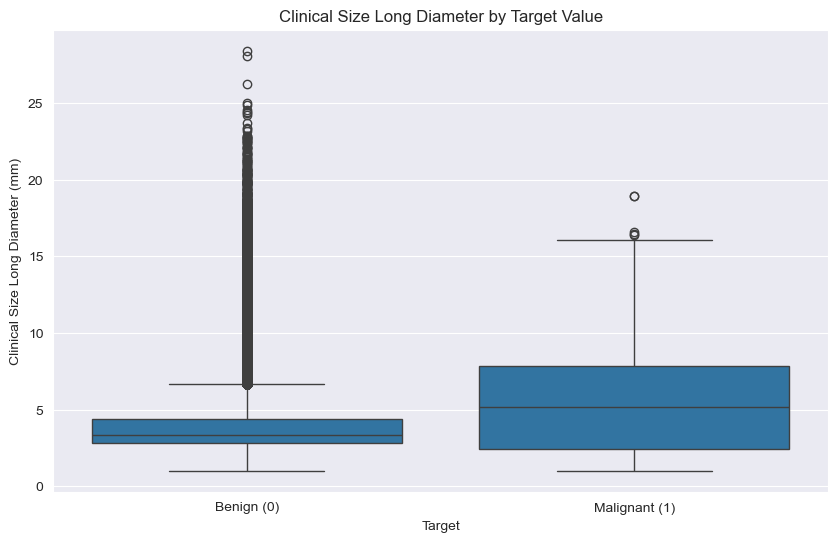

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_features_df, x='target', y='clin_size_long_diam_mm')
plt.title('Clinical Size Long Diameter by Target Value')
plt.xlabel('Target')
plt.ylabel('Clinical Size Long Diameter (mm)')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.show()

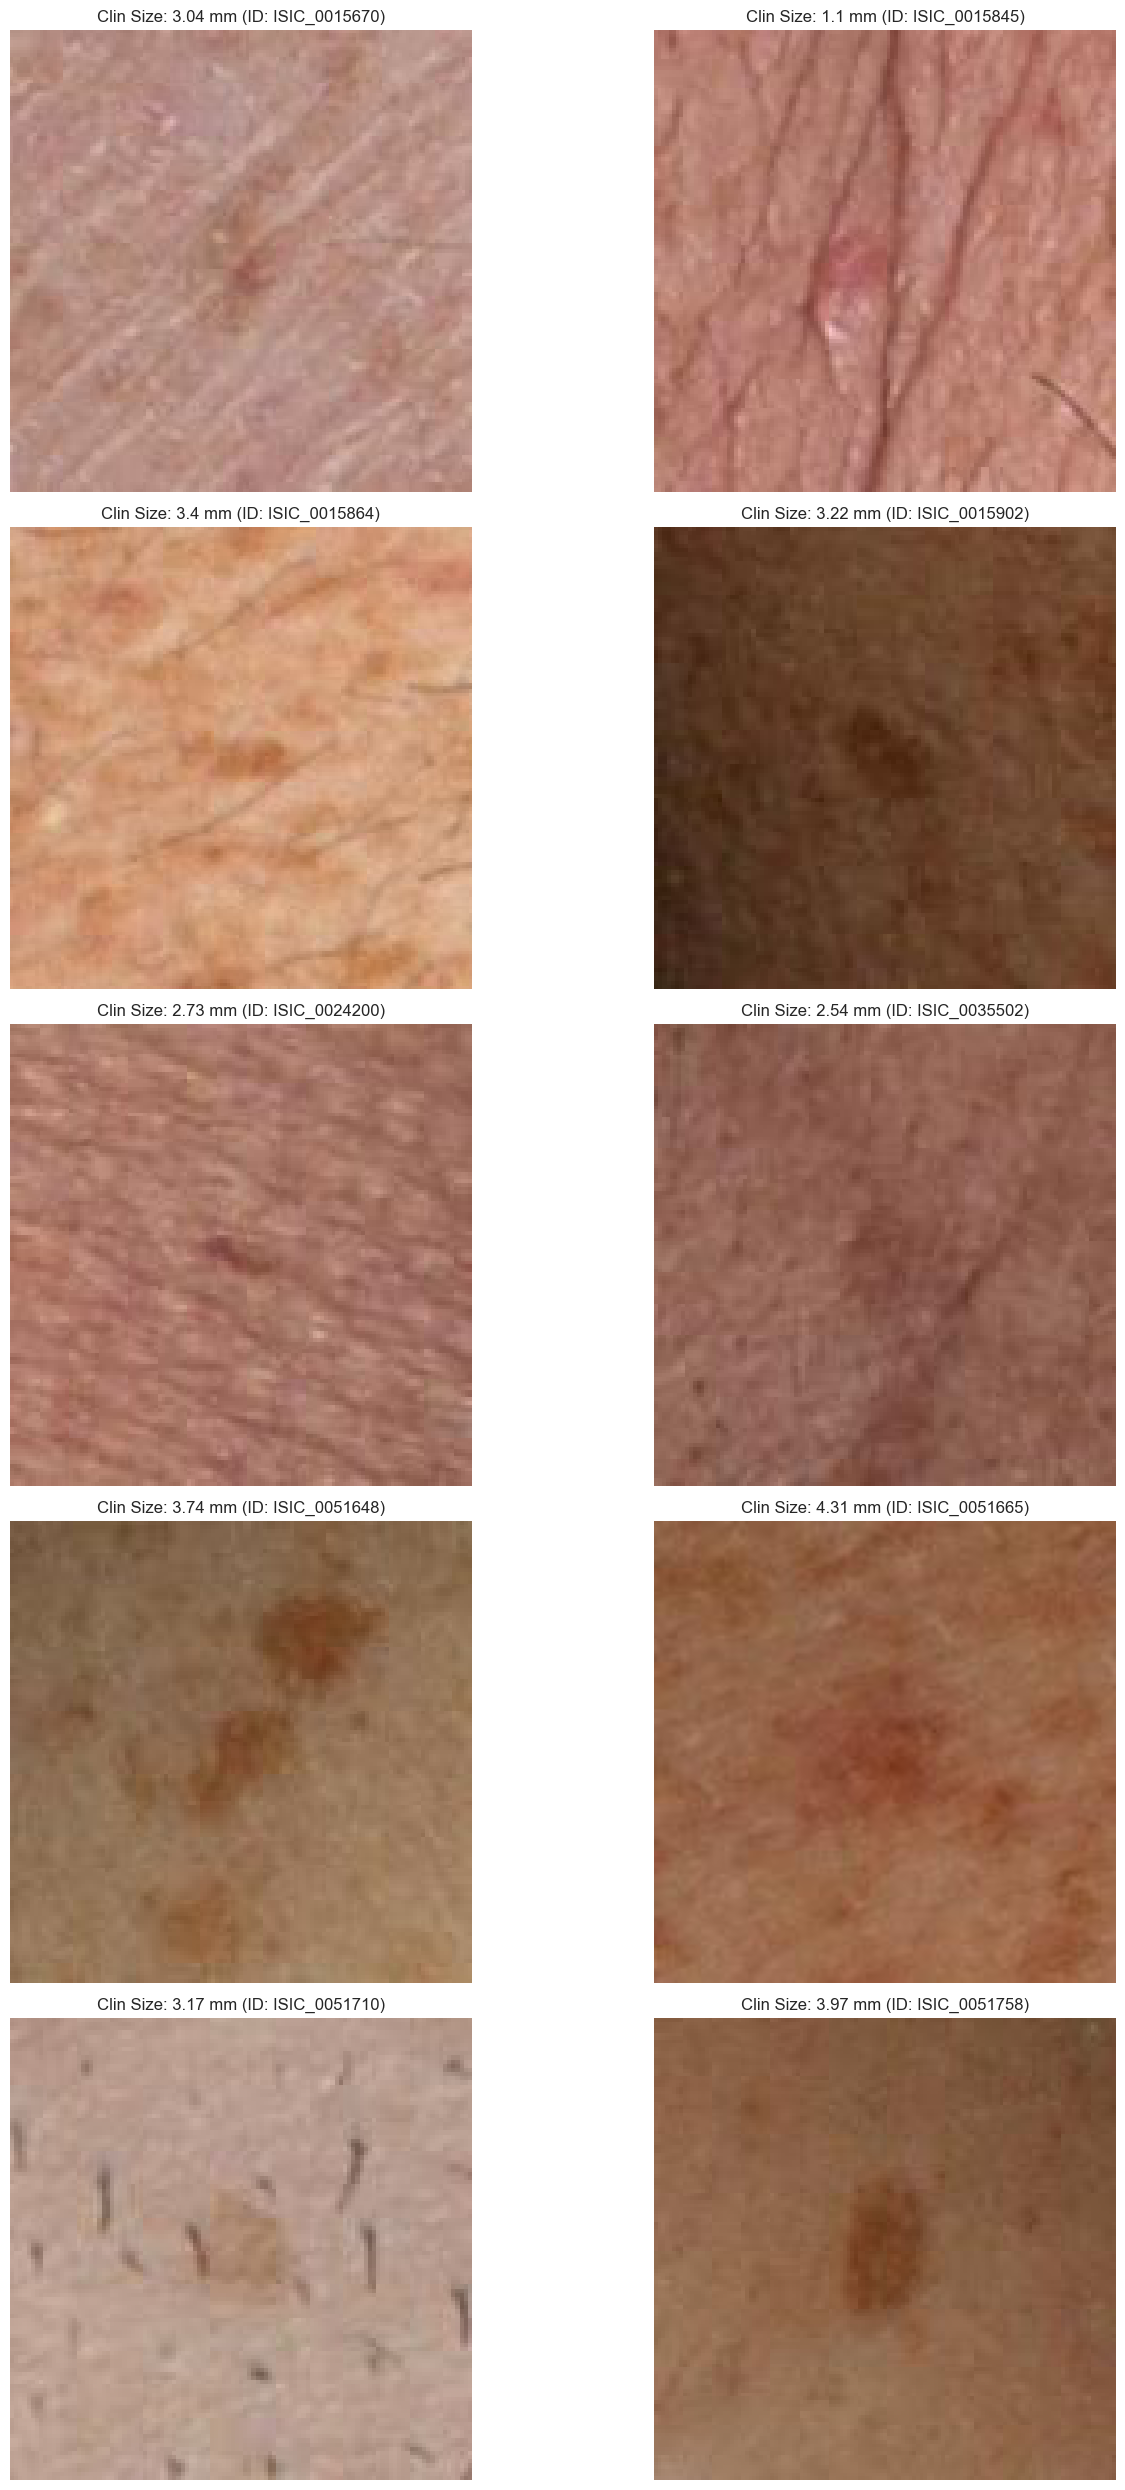

In [32]:
unique_clin_sizes = train_features_df['clin_size_long_diam_mm'].unique()

# Number of images to display per row
images_per_row = 2

# Limit the number of rows to avoid excessive size
max_rows = 5
display_count = 0

# Initialize the plot with a limited number of rows
fig, axes = plt.subplots(min(max_rows, len(unique_clin_sizes) // images_per_row + 1), images_per_row, figsize=(15, 5 * max_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Display one image for each unique value in clin_size_long_diam_mm
for idx, clin_size in enumerate(unique_clin_sizes):
    if display_count >= max_rows * images_per_row:
        break
    
    # Get the first isic_id for the current clin_size_long_diam_mm
    isic_ids = train_features_df[train_features_df['clin_size_long_diam_mm'] == clin_size]['isic_id'].values
    
    if len(isic_ids) > 0:
        isic_id = isic_ids[0]
        
        # Construct the full image path
        img_file = os.path.join(image_path, isic_id + '.jpg')
        
        # Check if the image file exists
        if os.path.exists(img_file):
            # Load and display the image
            img = Image.open(img_file)
            axes[display_count].imshow(img)
            axes[display_count].set_title(f'Clin Size: {clin_size} mm (ID: {isic_id})')
            axes[display_count].axis('off')
            display_count += 1
        else:
            print(f'Image not found for {isic_id}')
    else:
        print(f'No images found for clin_size_long_diam_mm: {clin_size}')

# Hide any unused axes
for ax in axes[display_count:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


Value counts of mel_thick_mm by target:
target         1
mel_thick_mm    
0.20           7
0.30          13
0.32           1
0.35           1
0.40          12
0.45           1
0.50           8
0.55           1
0.60           7
0.70           2
0.80           1
0.90           1
1.30           1
1.40           1
1.70           1
1.80           1
2.50           2
3.00           1
5.00           1


<Figure size 1000x600 with 0 Axes>

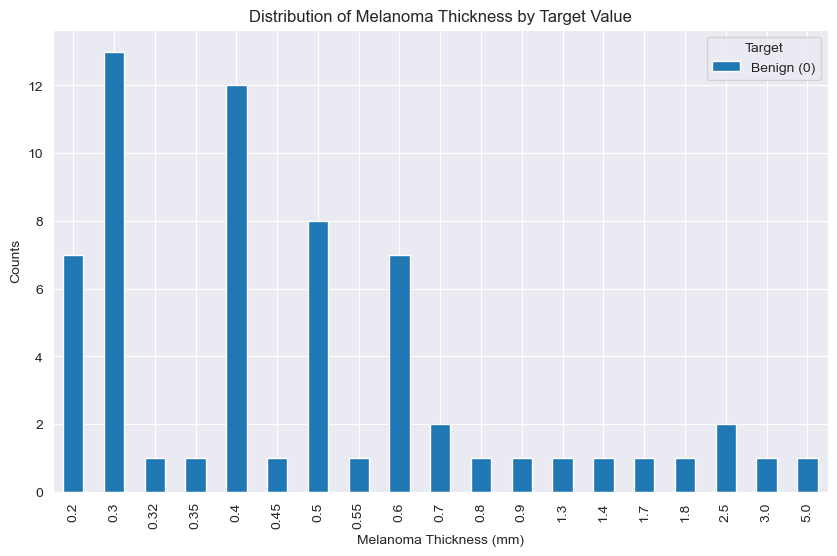

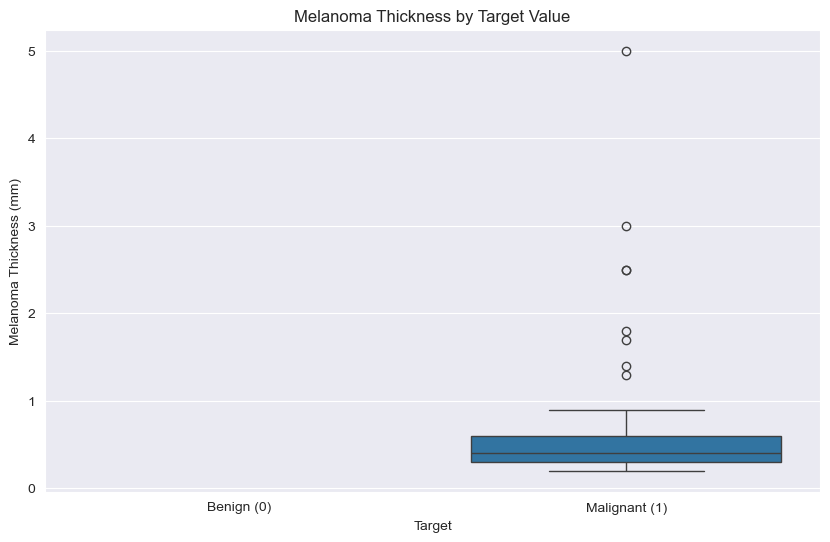

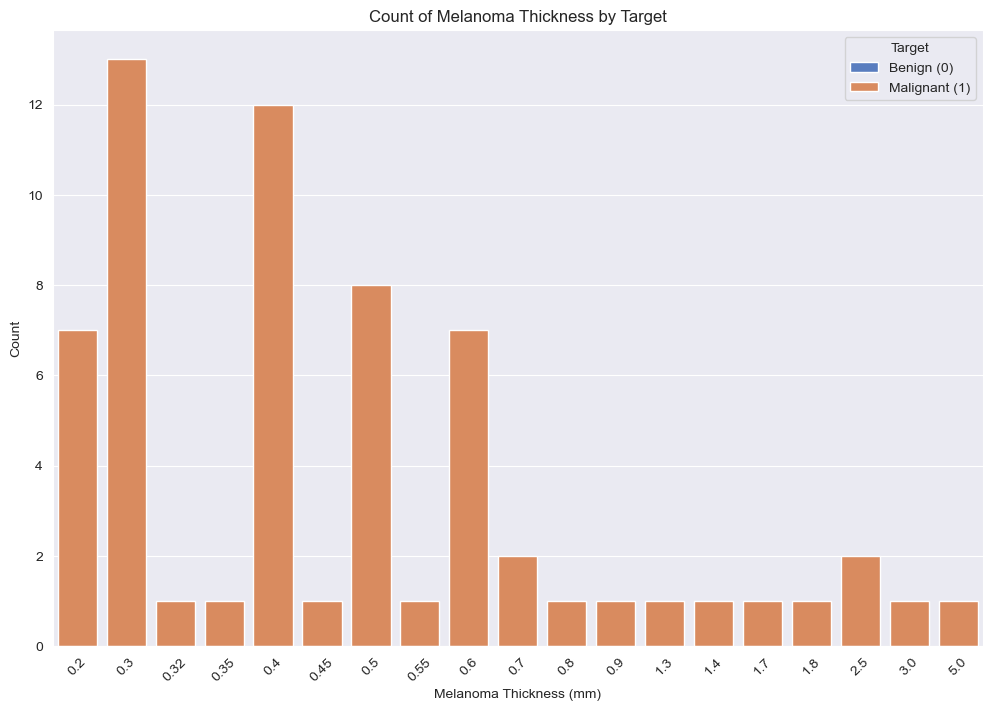

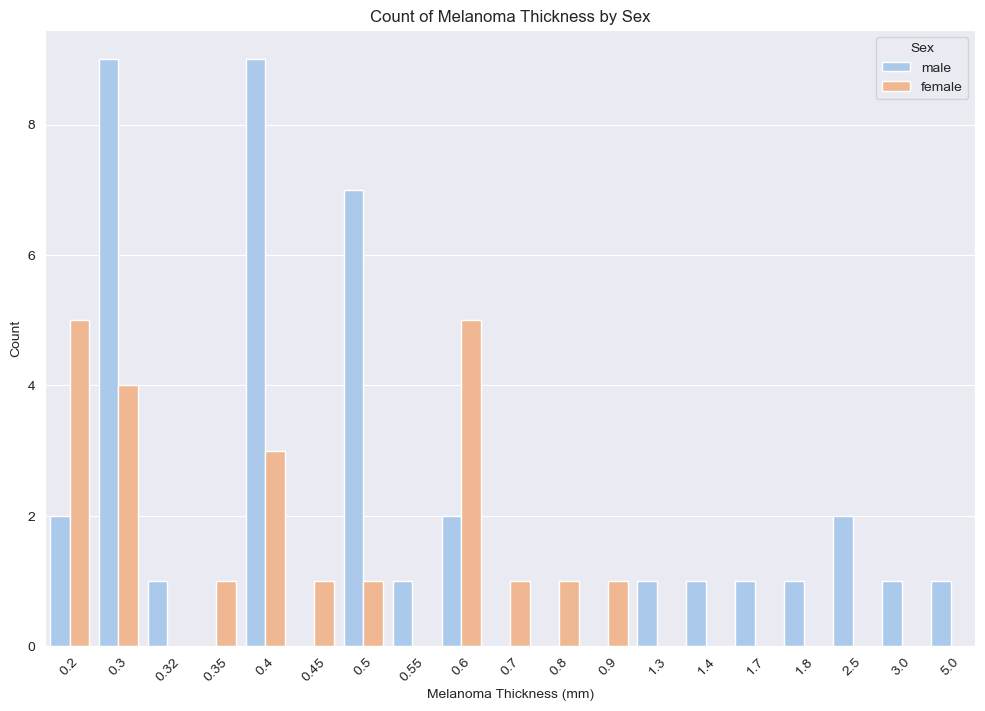

In [26]:
# Value counts of mel_thick_mm by target
mel_thick_mm_target_counts = train_features_df.groupby(['mel_thick_mm', 'target']).size().unstack(fill_value=0)
print("\nValue counts of mel_thick_mm by target:")
print(mel_thick_mm_target_counts)


plt.figure(figsize=(10, 6))
mel_thick_mm_target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Melanoma Thickness by Target Value')
plt.xlabel('Melanoma Thickness (mm)')
plt.ylabel('Counts')
plt.legend(title='Target', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

# Box plot of mel_thick_mm by target
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_features_df, x='target', y='mel_thick_mm')
plt.title('Melanoma Thickness by Target Value')
plt.xlabel('Target')
plt.ylabel('Melanoma Thickness (mm)')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.show()

# Count plot of mel_thick_mm by target
plt.figure(figsize=(12, 8))
sns.countplot(data=train_features_df, x='mel_thick_mm', hue='target', palette='muted')
plt.title('Count of Melanoma Thickness by Target')
plt.xlabel('Melanoma Thickness (mm)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

# Count plot of mel_thick_mm by sex
plt.figure(figsize=(12, 8))
sns.countplot(data=train_features_df, x='mel_thick_mm', hue='sex', palette='pastel')
plt.title('Count of Melanoma Thickness by Sex')
plt.xlabel('Melanoma Thickness (mm)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


Value counts of tbp_lv_dnn_lesion_confidence by target:
target                                    0    1
tbp_lv_dnn_lesion_confidence_binned             
(-0.1, 10.0]                            504   48
(10.0, 20.0]                             87    5
(20.0, 30.0]                             68    1
(30.0, 40.0]                             58    3
(40.0, 50.0]                             55    8
(50.0, 60.0]                           5965    7
(60.0, 70.0]                           6593    8
(70.0, 80.0]                           8024    9
(80.0, 90.0]                          12536   19
(90.0, 100.0]                        366776  285


<Figure size 1000x600 with 0 Axes>

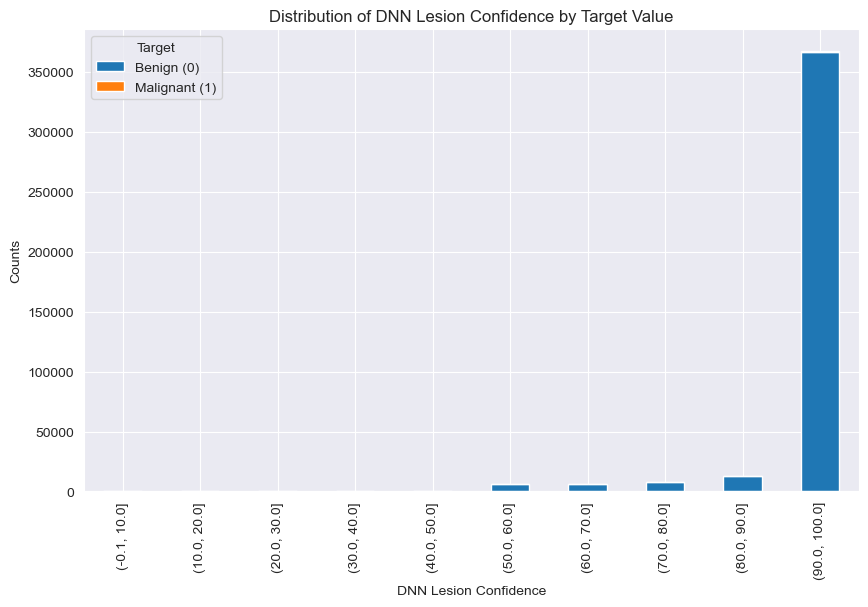

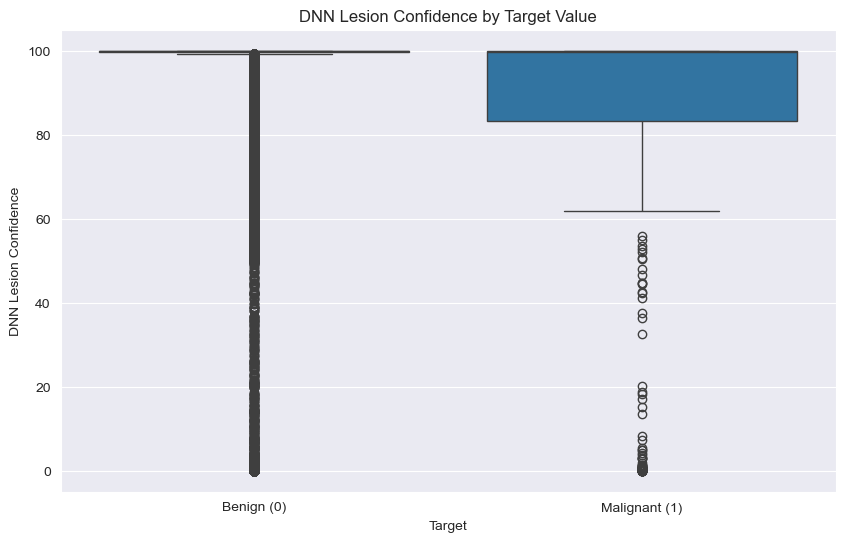

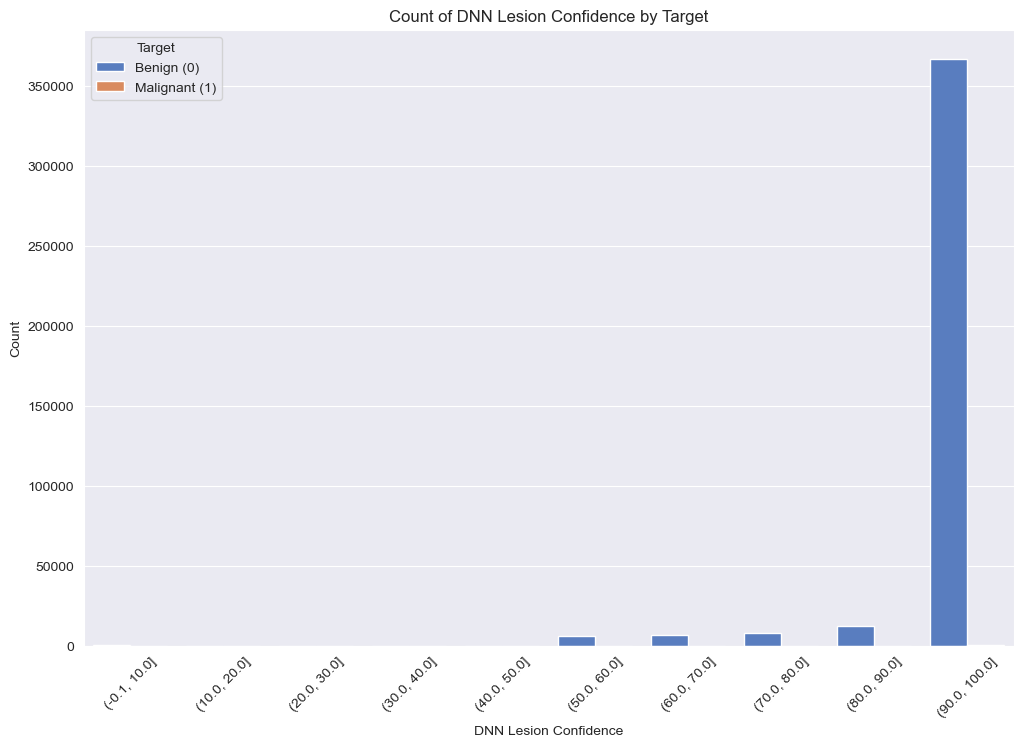

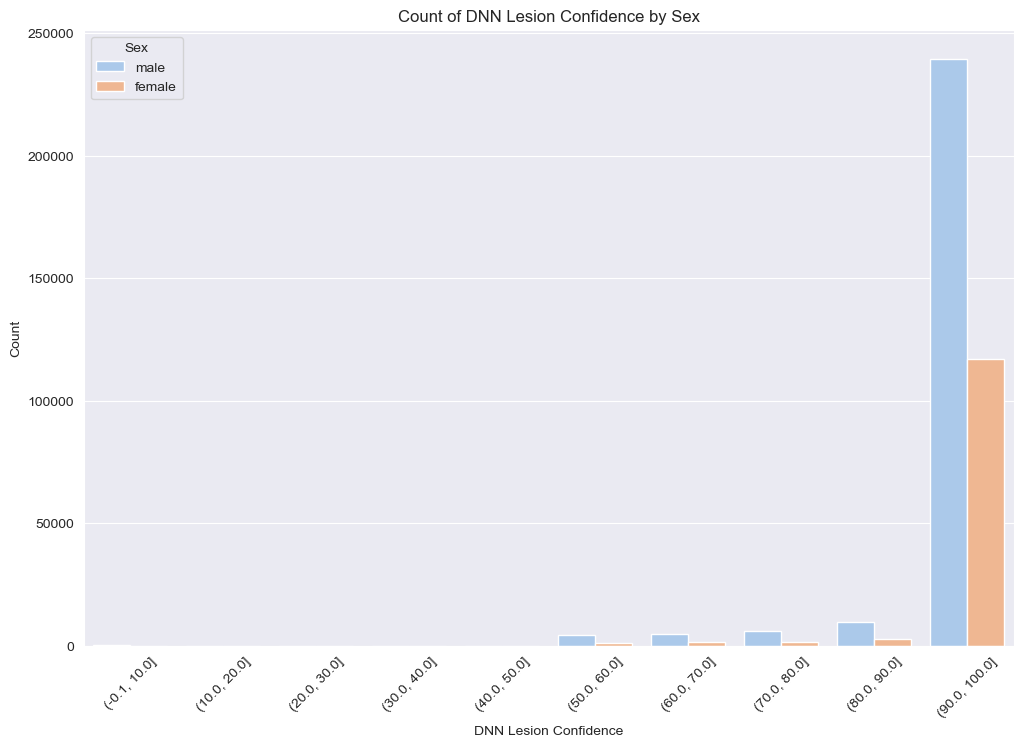

In [27]:
train_features_df['tbp_lv_dnn_lesion_confidence_binned'] = pd.cut(train_features_df['tbp_lv_dnn_lesion_confidence'], bins=10)

# Value counts of tbp_lv_dnn_lesion_confidence by target
tbp_lv_dnn_lesion_confidence_target_counts = train_features_df.groupby(['tbp_lv_dnn_lesion_confidence_binned', 'target']).size().unstack(fill_value=0)
print("\nValue counts of tbp_lv_dnn_lesion_confidence by target:")
print(tbp_lv_dnn_lesion_confidence_target_counts)

# Plotting the distribution of tbp_lv_dnn_lesion_confidence by target value
plt.figure(figsize=(10, 6))
tbp_lv_dnn_lesion_confidence_target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of DNN Lesion Confidence by Target Value')
plt.xlabel('DNN Lesion Confidence')
plt.ylabel('Counts')
plt.legend(title='Target', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

# Box plot of tbp_lv_dnn_lesion_confidence by target
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_features_df, x='target', y='tbp_lv_dnn_lesion_confidence')
plt.title('DNN Lesion Confidence by Target Value')
plt.xlabel('Target')
plt.ylabel('DNN Lesion Confidence')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.show()

# Count plot of tbp_lv_dnn_lesion_confidence by target
plt.figure(figsize=(12, 8))
sns.countplot(data=train_features_df, x='tbp_lv_dnn_lesion_confidence_binned', hue='target', palette='muted')
plt.title('Count of DNN Lesion Confidence by Target')
plt.xlabel('DNN Lesion Confidence')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

# Count plot of tbp_lv_dnn_lesion_confidence by sex
plt.figure(figsize=(12, 8))
sns.countplot(data=train_features_df, x='tbp_lv_dnn_lesion_confidence_binned', hue='sex', palette='pastel')
plt.title('Count of DNN Lesion Confidence by Sex')
plt.xlabel('DNN Lesion Confidence')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


Value counts of tbp_lv_areaMM2 by target:
target                      0    1
tbp_lv_areaMM2_binned             
(0.0979, 33.804]       391315  313
(33.804, 67.176]         7461   43
(67.176, 100.548]        1349   25
(100.548, 133.92]         386   10
(133.92, 167.292]         110    2
(167.292, 200.664]         35    0
(200.664, 234.036]          7    0
(234.036, 267.408]          1    0
(267.408, 300.781]          1    0
(300.781, 334.153]          1    0


<Figure size 1000x600 with 0 Axes>

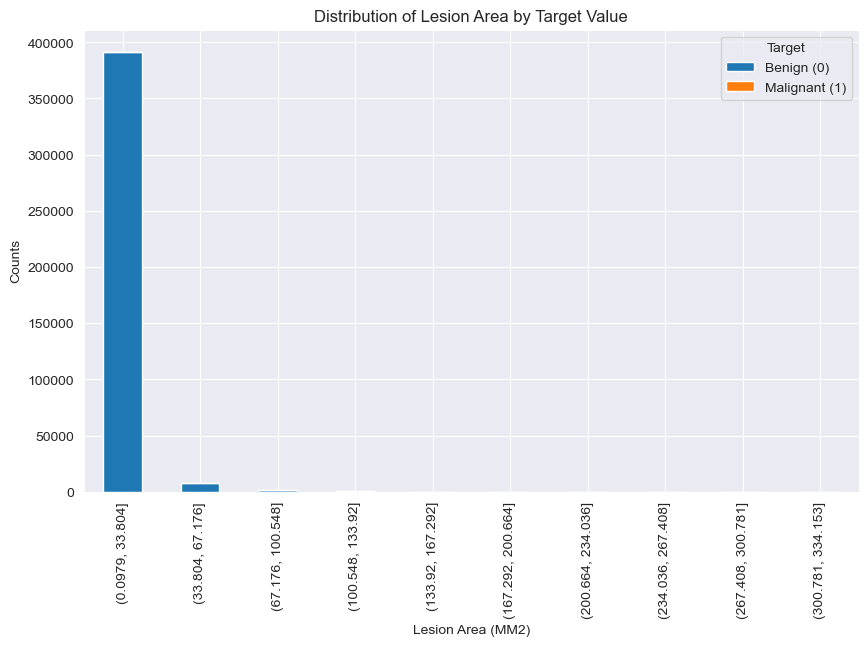

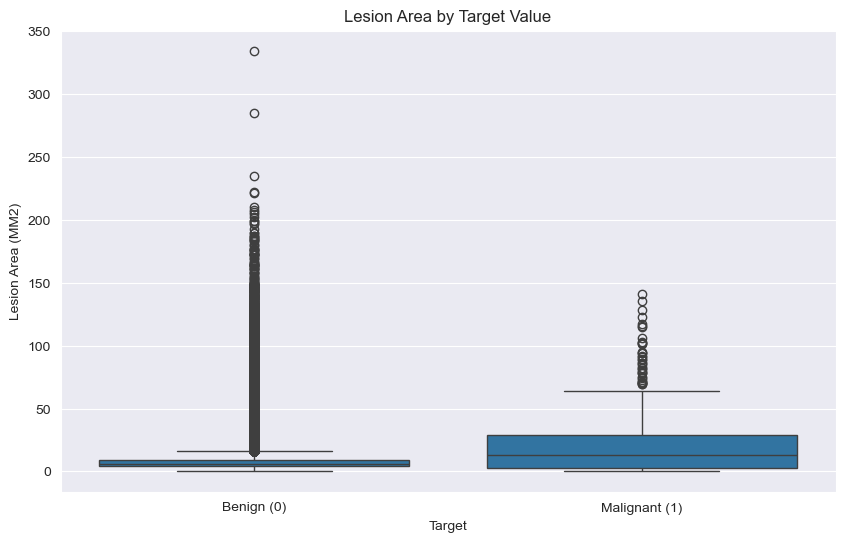

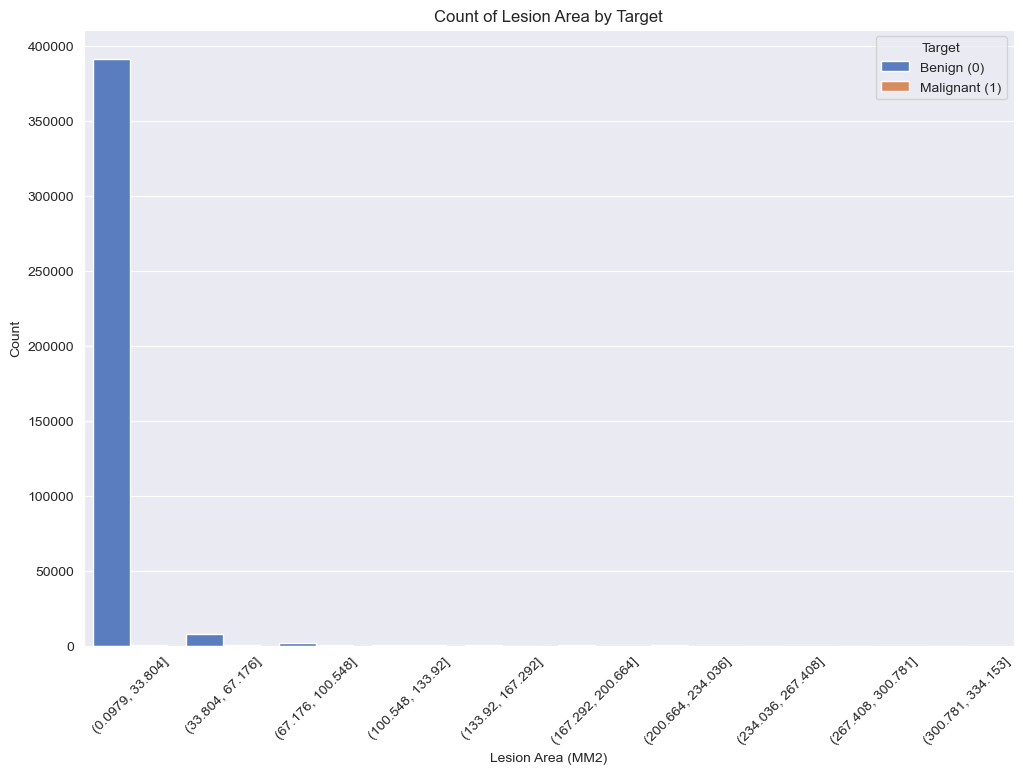

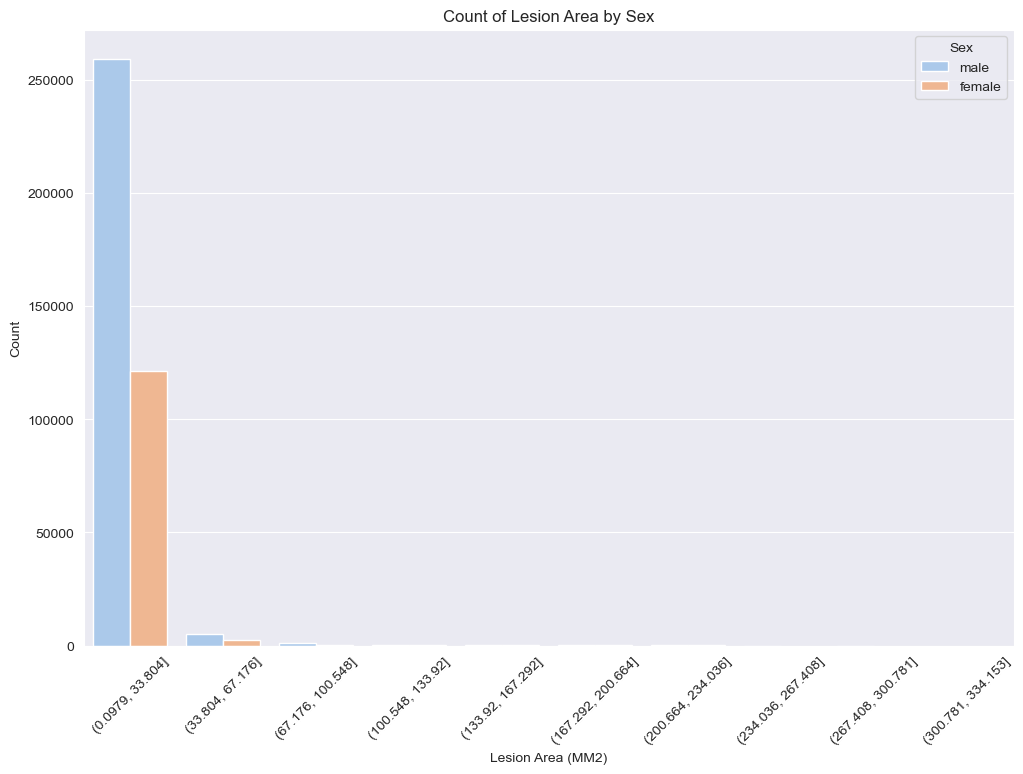

In [28]:
train_features_df['tbp_lv_areaMM2_binned'] = pd.cut(train_features_df['tbp_lv_areaMM2'], bins=10)

# Value counts of tbp_lv_areaMM2 by target
tbp_lv_areaMM2_target_counts = train_features_df.groupby(['tbp_lv_areaMM2_binned', 'target']).size().unstack(fill_value=0)
print("\nValue counts of tbp_lv_areaMM2 by target:")
print(tbp_lv_areaMM2_target_counts)

# Plotting the distribution of tbp_lv_areaMM2 by target value
plt.figure(figsize=(10, 6))
tbp_lv_areaMM2_target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Lesion Area by Target Value')
plt.xlabel('Lesion Area (MM2)')
plt.ylabel('Counts')
plt.legend(title='Target', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

# Box plot of tbp_lv_areaMM2 by target
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_features_df, x='target', y='tbp_lv_areaMM2')
plt.title('Lesion Area by Target Value')
plt.xlabel('Target')
plt.ylabel('Lesion Area (MM2)')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.show()

# Count plot of tbp_lv_areaMM2 by target
plt.figure(figsize=(12, 8))
sns.countplot(data=train_features_df, x='tbp_lv_areaMM2_binned', hue='target', palette='muted')
plt.title('Count of Lesion Area by Target')
plt.xlabel('Lesion Area (MM2)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

# Count plot of tbp_lv_areaMM2 by sex
plt.figure(figsize=(12, 8))
sns.countplot(data=train_features_df, x='tbp_lv_areaMM2_binned', hue='sex', palette='pastel')
plt.title('Count of Lesion Area by Sex')
plt.xlabel('Lesion Area (MM2)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


Value counts of tbp_lv_areaMM2 by target:
target                      0    1
tbp_lv_areaMM2_binned             
(0.0979, 33.804]       391315  313
(33.804, 67.176]         7461   43
(67.176, 100.548]        1349   25
(100.548, 133.92]         386   10
(133.92, 167.292]         110    2
(167.292, 200.664]         35    0
(200.664, 234.036]          7    0
(234.036, 267.408]          1    0
(267.408, 300.781]          1    0
(300.781, 334.153]          1    0


<Figure size 1000x600 with 0 Axes>

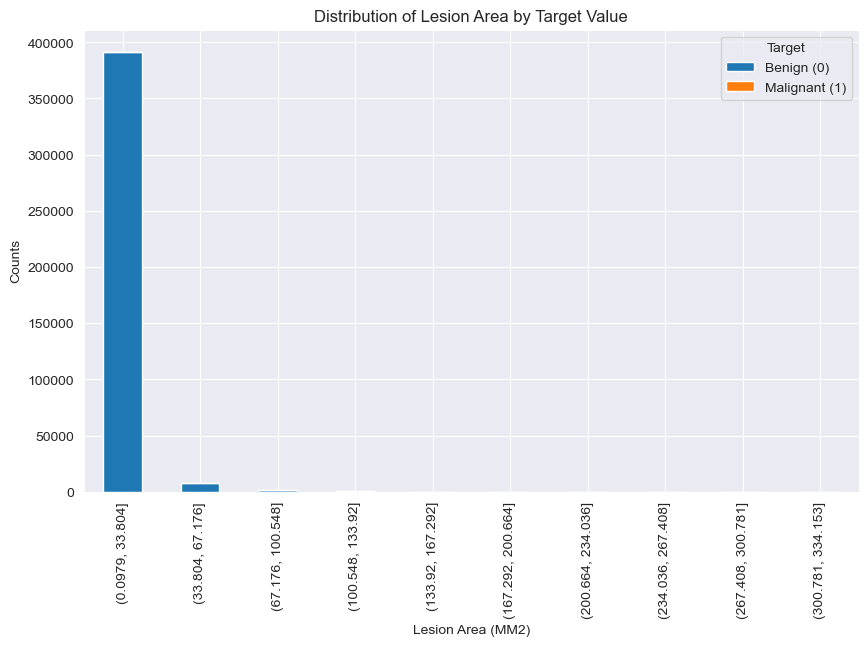

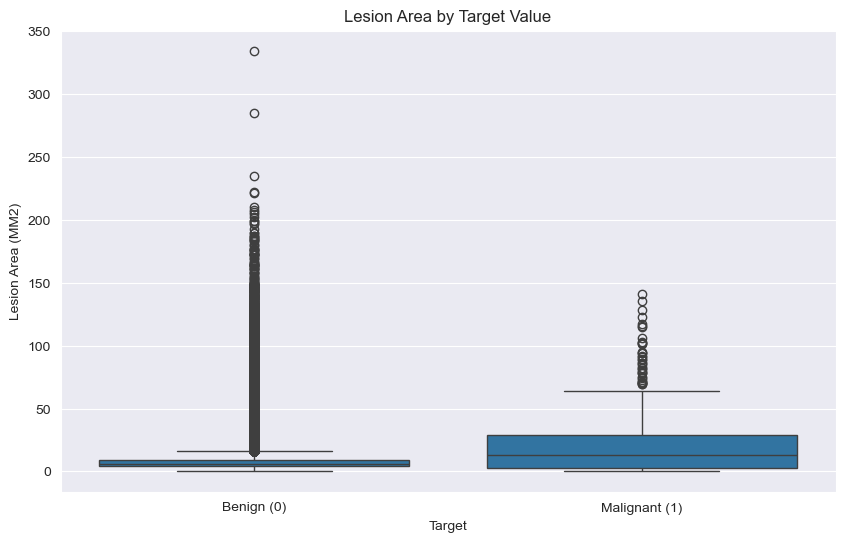

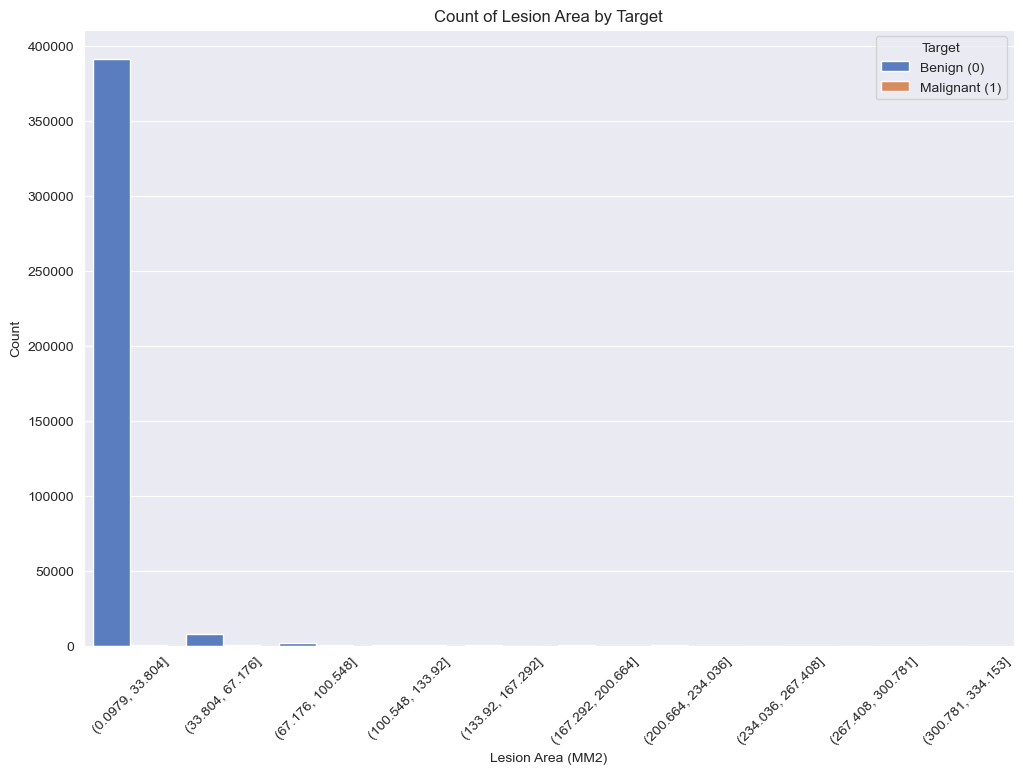

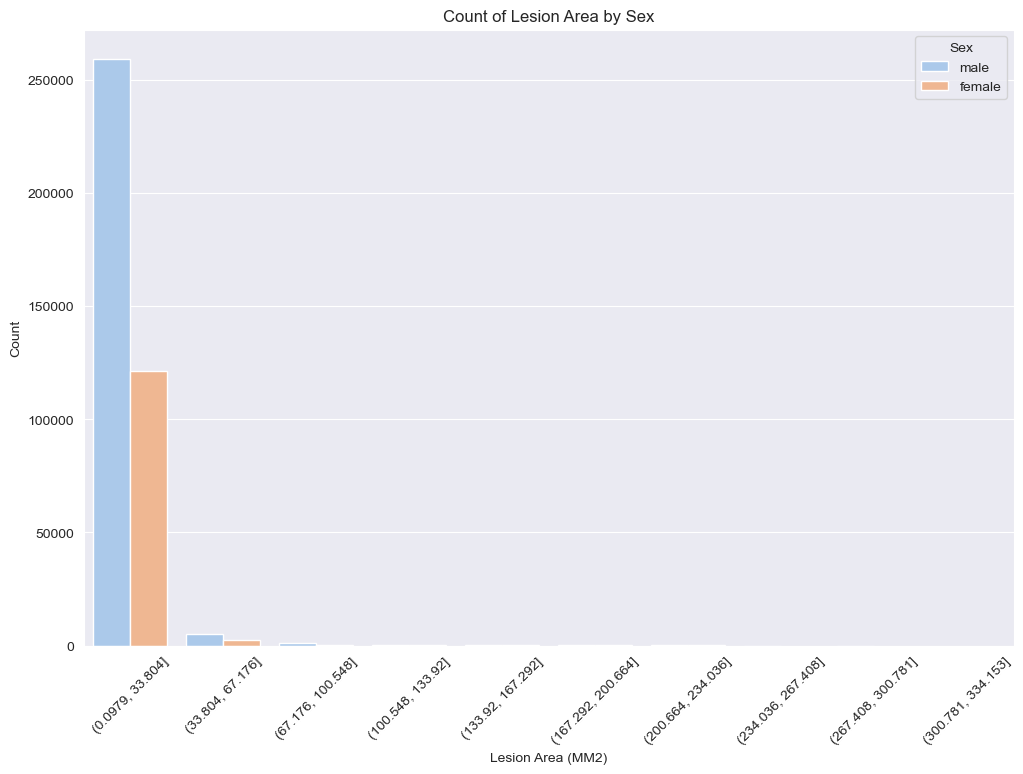

In [29]:
train_features_df['tbp_lv_areaMM2_binned'] = pd.cut(train_features_df['tbp_lv_areaMM2'], bins=10)

# Value counts of tbp_lv_areaMM2 by target
tbp_lv_areaMM2_target_counts = train_features_df.groupby(['tbp_lv_areaMM2_binned', 'target']).size().unstack(fill_value=0)
print("\nValue counts of tbp_lv_areaMM2 by target:")
print(tbp_lv_areaMM2_target_counts)

# Plotting the distribution of tbp_lv_areaMM2 by target value
plt.figure(figsize=(10, 6))
tbp_lv_areaMM2_target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Lesion Area by Target Value')
plt.xlabel('Lesion Area (MM2)')
plt.ylabel('Counts')
plt.legend(title='Target', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

# Box plot of tbp_lv_areaMM2 by target
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_features_df, x='target', y='tbp_lv_areaMM2')
plt.title('Lesion Area by Target Value')
plt.xlabel('Target')
plt.ylabel('Lesion Area (MM2)')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.show()

# Count plot of tbp_lv_areaMM2 by target
plt.figure(figsize=(12, 8))
sns.countplot(data=train_features_df, x='tbp_lv_areaMM2_binned', hue='target', palette='muted')
plt.title('Count of Lesion Area by Target')
plt.xlabel('Lesion Area (MM2)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

# Count plot of tbp_lv_areaMM2 by sex
plt.figure(figsize=(12, 8))
sns.countplot(data=train_features_df, x='tbp_lv_areaMM2_binned', hue='sex', palette='pastel')
plt.title('Count of Lesion Area by Sex')
plt.xlabel('Lesion Area (MM2)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()

Columns in DataFrame: Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       

<Figure size 1000x600 with 0 Axes>

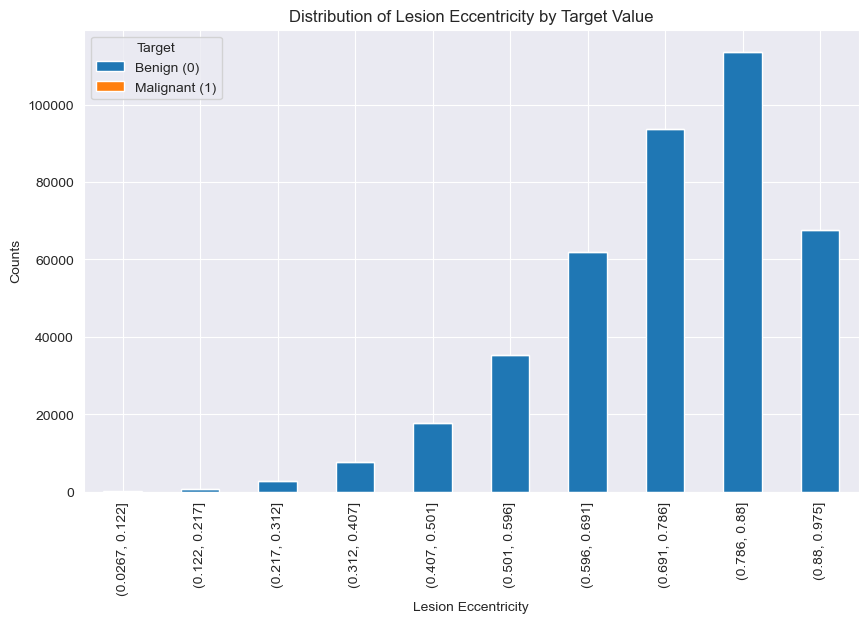

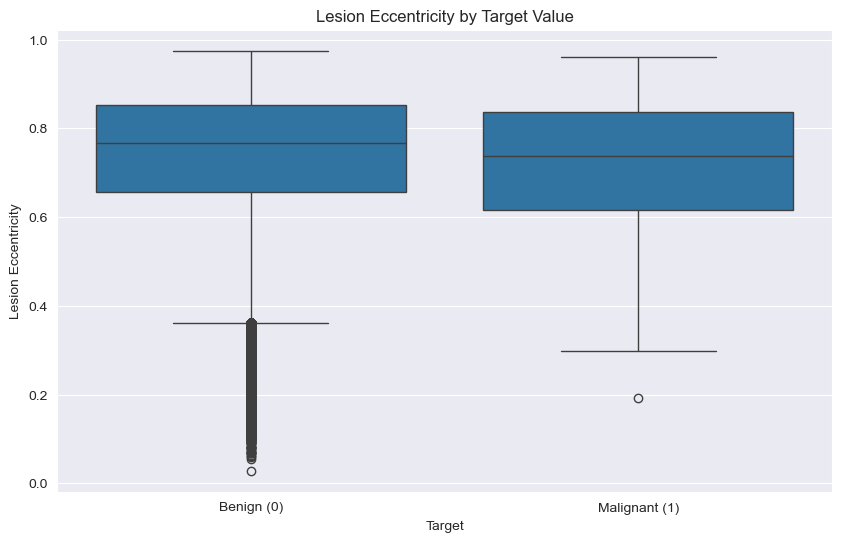

Text(0, 0.5, 'Count')

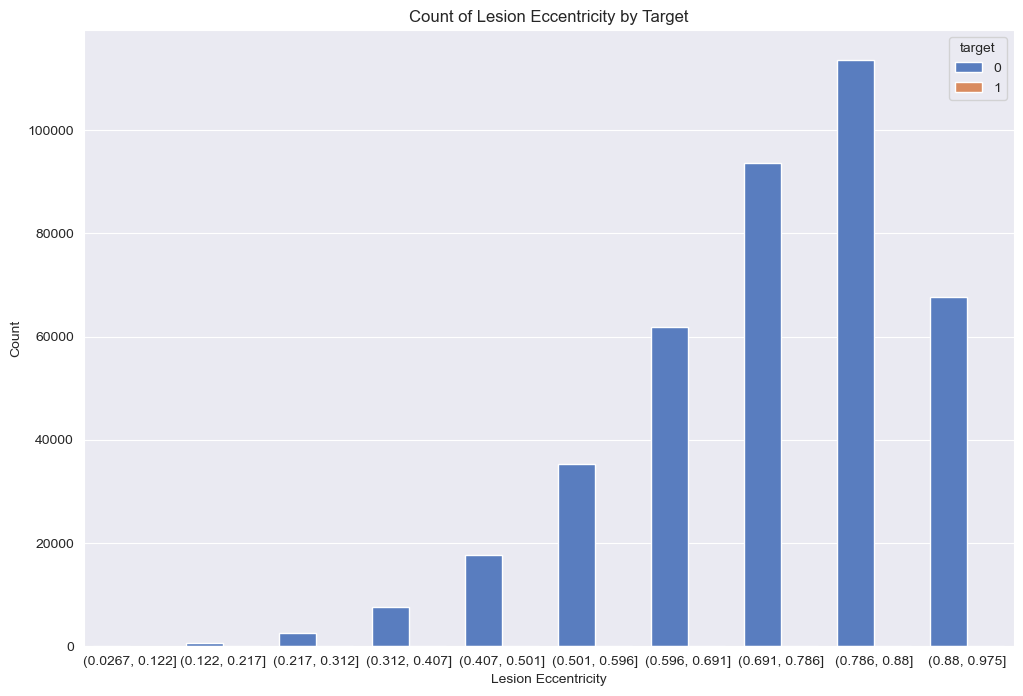

In [30]:
# Verify column names
print("Columns in DataFrame:", train_features_df.columns)

# Reduce granularity by binning the values
train_features_df['tbp_lv_eccentricity_binned'] = pd.cut(train_features_df['tbp_lv_eccentricity'], bins=10)

# Value counts of tbp_lv_eccentricity by target
tbp_lv_eccentricity_target_counts = train_features_df.groupby(['tbp_lv_eccentricity_binned', 'target']).size().unstack(fill_value=0)
print("\nValue counts of tbp_lv_eccentricity by target:")
print(tbp_lv_eccentricity_target_counts)

# Plotting the distribution of tbp_lv_eccentricity by target value
plt.figure(figsize=(10, 6))
tbp_lv_eccentricity_target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Lesion Eccentricity by Target Value')
plt.xlabel('Lesion Eccentricity')
plt.ylabel('Counts')
plt.legend(title='Target', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

# Box plot of tbp_lv_eccentricity by target
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_features_df, x='target', y='tbp_lv_eccentricity')
plt.title('Lesion Eccentricity by Target Value')
plt.xlabel('Target')
plt.ylabel('Lesion Eccentricity')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.show()

# Count plot of tbp_lv_eccentricity by target
plt.figure(figsize=(12, 8))
sns.countplot(data=train_features_df, x='tbp_lv_eccentricity_binned', hue='target', palette='muted')
plt.title('Count of Lesion Eccentricity by Target')
plt.xlabel('Lesion Eccentricity')
plt.ylabel('Count')


Value counts of tbp_lv_symm_2axis by target:
target                         0    1
tbp_lv_symm_2axis_binned             
(0.0511, 0.145]            19380   38
(0.145, 0.237]            118563   83
(0.237, 0.33]             115925  108
(0.33, 0.422]              74782   77
(0.422, 0.515]             42532   46
(0.515, 0.607]             20241   29
(0.607, 0.7]                7288   10
(0.7, 0.792]                1742    2
(0.792, 0.885]               208    0
(0.885, 0.977]                 5    0


<Figure size 1000x600 with 0 Axes>

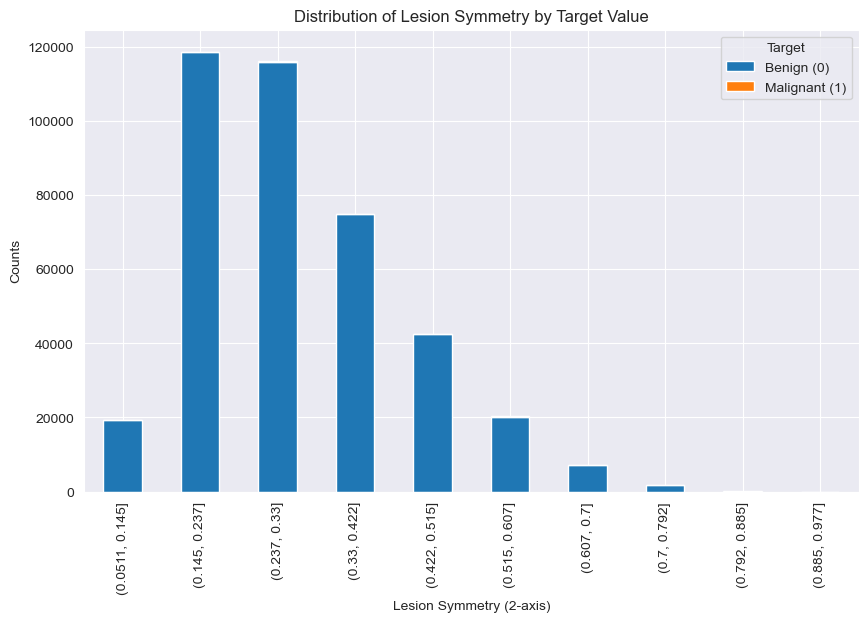

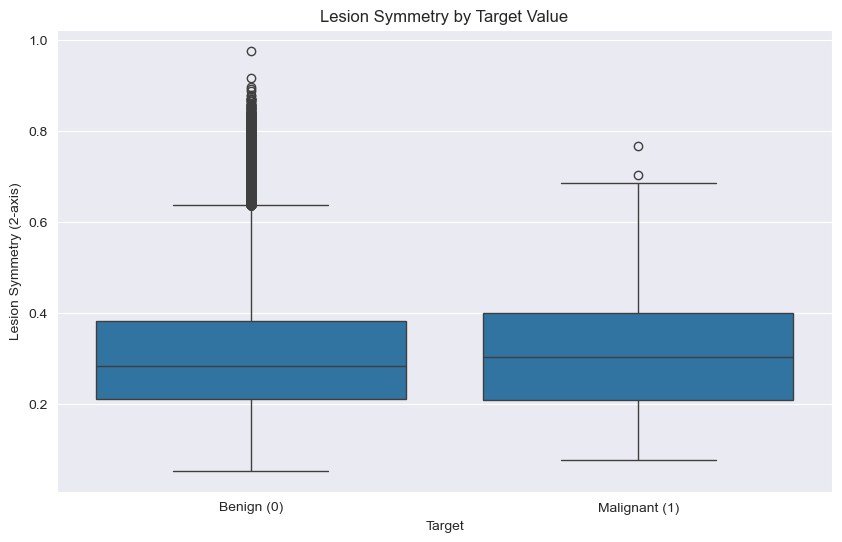

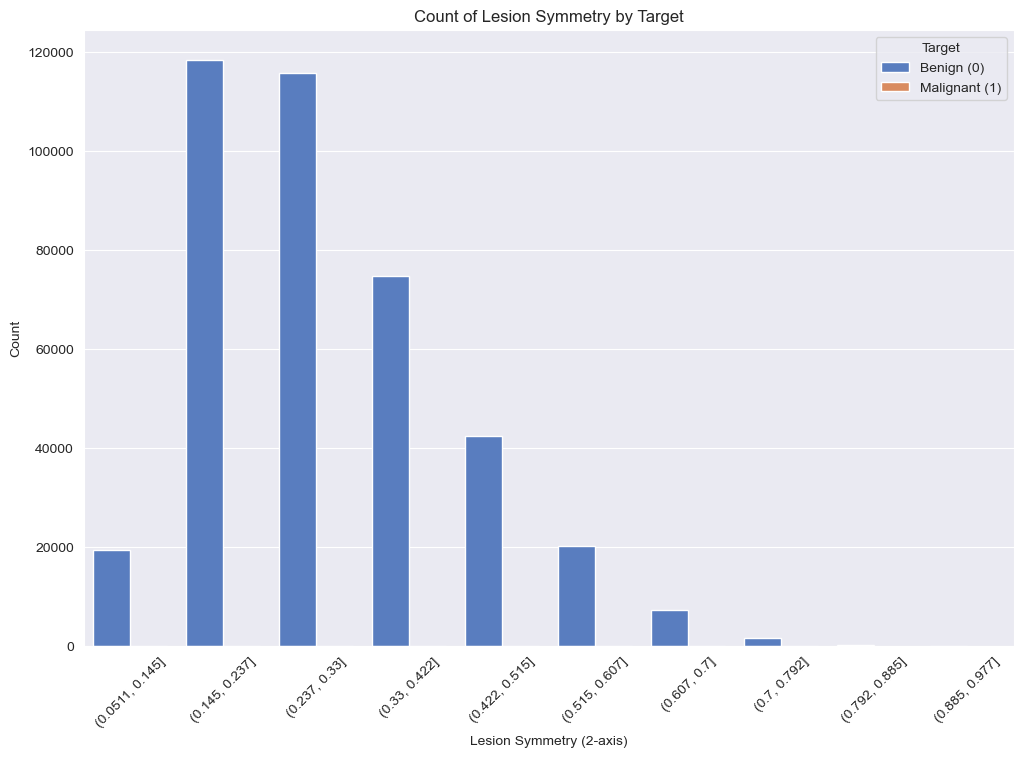

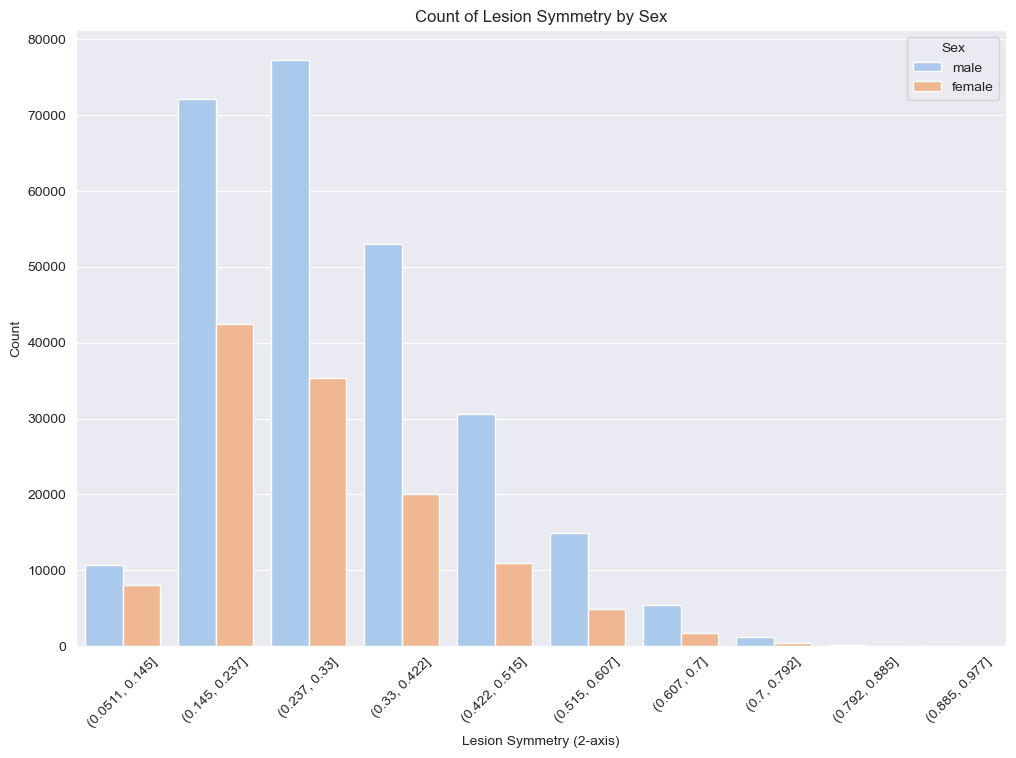

In [31]:
train_features_df['tbp_lv_symm_2axis_binned'] = pd.cut(train_features_df['tbp_lv_symm_2axis'], bins=10)

# Value counts of tbp_lv_symm_2axis by target
tbp_lv_symm_2axis_target_counts = train_features_df.groupby(['tbp_lv_symm_2axis_binned', 'target']).size().unstack(fill_value=0)
print("\nValue counts of tbp_lv_symm_2axis by target:")
print(tbp_lv_symm_2axis_target_counts)

# Plotting the distribution of tbp_lv_symm_2axis by target value
plt.figure(figsize=(10, 6))
tbp_lv_symm_2axis_target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Lesion Symmetry by Target Value')
plt.xlabel('Lesion Symmetry (2-axis)')
plt.ylabel('Counts')
plt.legend(title='Target', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

# Box plot of tbp_lv_symm_2axis by target
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_features_df, x='target', y='tbp_lv_symm_2axis')
plt.title('Lesion Symmetry by Target Value')
plt.xlabel('Target')
plt.ylabel('Lesion Symmetry (2-axis)')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.show()

# Count plot of tbp_lv_symm_2axis by target
plt.figure(figsize=(12, 8))
sns.countplot(data=train_features_df, x='tbp_lv_symm_2axis_binned', hue='target', palette='muted')
plt.title('Count of Lesion Symmetry by Target')
plt.xlabel('Lesion Symmetry (2-axis)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

# Count plot of tbp_lv_symm_2axis by sex
plt.figure(figsize=(12, 8))
sns.countplot(data=train_features_df, x='tbp_lv_symm_2axis_binned', hue='sex', palette='pastel')
plt.title('Count of Lesion Symmetry by Sex')
plt.xlabel('Lesion Symmetry (2-axis)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()